# NumPy

### 1. 匯入NumPy模組

使用簡寫`np`代替`numpy`是行業內的慣例(Convention)。

In [1]:
import numpy as np

### 2. 創建`ndarray`

- 可以利用`np.array()`將Python列表(List)轉換為NumPy的`ndarray`。
- 用`type()`檢查，可以發現資料類型是`numpy.ndarray`。
- `ndarray`不能儲存不同資料類型的項目，若強行創建，NumPy會把它們都轉換成字串(String)。
- 用`ndarray.dtype`可以檢查陣列元素的資料類型。
- `np.array()`可以用`dtype`參數指定資料類型，NumPy支援多種資料類型。

[Data Type Objects (dtype)](https://numpy.org/doc/stable/reference/arrays.dtypes.html)

In [2]:
lst = [1, 2, 3]
arr = np.array([1, 2, 3])
arr

array([1, 2, 3])

In [3]:
type(arr)

numpy.ndarray

In [4]:
# `ndarray.dtype`
arr.dtype

dtype('int64')

In [5]:
# Array can't store elements with different types. Numpy will cast them into `str`
arr = np.array([1, "Pyhon", 3, True, 5])
arr

array(['1', 'Pyhon', '3', 'True', '5'], dtype='<U21')

In [6]:
# `<U21` = `<`: Little Endian, `U`: Unicode, `12`: 12 characters
arr.dtype.type

numpy.str_

In [7]:
arr = np.array([1.4, 2.3, 3.6])
arr.dtype

dtype('float64')

In [8]:
arr = np.array([1.4, 2.3, 3.6], dtype="f")
arr.dtype

dtype('float32')

### 3. `ndarray`的基本操作(Operations)

- `ndarray`是一種序列(Sequence)，可以直接用for迴圈跑過每個元素(Element)。
- 新增元素用`np.append(arr, elem)`。
- 插入元素用`np.insert(arr, index, elem)`。
- 更新元素和Python列表(List)一樣，直接用索引值(Index)存取該元素，指定內容(Value)。
- 刪除元素用`np.delete(arr, index)`。
- 新增、插入、刪除事實上都是回傳新的陣列。



In [9]:
# Loop through a Python list
lst = [1, 2, 3]

for elem in lst:
    print(elem)

1
2
3


In [10]:
# `ndarray` is a kind of sequence, can be looped through like normal list
arr = np.array([1, 2, 3])

for elem in arr:
    print(elem)

1
2
3


In [11]:
lst.append(4)
lst

[1, 2, 3, 4]

In [12]:
# There is no `append()` method for `ndarray`
# arr.append(4)
# arr

In [13]:
# `np.append(arr, elem)`
np.append(arr, 4)

array([1, 2, 3, 4])

In [14]:
# `np.insert(arr, index, elem)`
np.insert(arr, 0, 30)

array([30,  1,  2,  3])

In [15]:
# Update
arr[1] = 10
arr

array([ 1, 10,  3])

In [16]:
# `np.delete(arr, index)`
np.delete(arr, 0)

array([10,  3])

In [17]:
# Use `id()` and `ndarray.nbytes` to check size before and after `np.insert()`
arr = np.array([1, 2, 3])

print("Original array id:", id(arr))
print("Original array size:", arr.nbytes)

arr_inserted = np.insert(arr, 0, 30)

print("Array id after insertion:", id(arr_inserted))
print("Array size after insertion:", arr_inserted.nbytes)

Original array id: 139220760303568
Original array size: 24
Array id after insertion: 139220760303760
Array size after insertion: 32


### 4. 形狀(Shape)、維度(Dimension)、大小(Size)
- `ndarray.shape`是陣列每個維度的大小。
- `ndarray.ndim`是陣列的維度。
- `ndarray.size`是陣列中元素的總數。

In [18]:
# `ndarray.shape`
arr = np.array([1, 2, 3, 4, 5, 6])

arr.shape

(6,)

In [19]:
# `ndarray.shape` is a tuple
type(arr.shape)

tuple

In [20]:
# `array.ndim`
arr.ndim

1

In [21]:
# `arr.size`
arr.size

6

In [22]:
# Multi-dimensional array
arr = np.array([[1, 2, 3], [4, 5, 6]])
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [23]:
arr.shape

(2, 3)

In [24]:
arr.ndim

2

In [25]:
arr.size

6

### 5. `reshape()`
- `ndarray.reshape()`可以改變陣列的維度，新的形狀(Shape)元素總數要符合，回傳的是陣列的外觀(View)，並不像上面的`np.append()`、`np.insert()`、`np.delete()`會新增一個陣列，改變記憶體位置。
- `ndarray.reshape()`可以用`-1`讓NumPy自己決定該維度大小。

In [26]:
# `ndarray.reshape()`
arr = np.array([[1, 2, 3], [4, 5, 6]])

arr = arr.reshape(3, 2)
arr

array([[1, 2],
       [3, 4],
       [5, 6]])

In [27]:
arr.shape

(3, 2)

In [28]:
# `-1` unknown dimension
arr = arr.reshape(-1, 3)
arr.shape

(2, 3)

In [29]:
# `ndarray.reshape(-1)` we get column as 1 but rows as unknown
arr = arr.reshape(-1)
arr

array([1, 2, 3, 4, 5, 6])

In [30]:
arr.shape

(6,)

In [31]:
arr.ndim

1

In [32]:
# Reshape to 1 row and unknown columns
arr = np.array([[1, 2, 3], [4, 5, 6]])

arr = arr.reshape(1, -1)
arr

array([[1, 2, 3, 4, 5, 6]])

In [33]:
arr.shape

(1, 6)

In [34]:
arr.ndim

2

In [35]:
# Create a NumPy array with shape = (3, 3)
arr = np.array([[1, 2, 3], [1, 2, 3], [1, 2, 3]])

arr.shape

(3, 3)

### 6. 廣播(Broadcast)
- 廣播(Broadcast)是NumPy對不同形狀(Shape)的陣列進行數值計算的方式，在Python我們需要使用for迴圈。
- 當操作兩個陣列時，NumPy會逐元素(Element-Wise)比較它們的形狀(shape)，從右到左。
- 當陣列的形狀相同或其中一個維度是$1$時相容(Compatible)。
- NumPy內建一些常見數學運算的函數，例如：`np.sqrt()`、`np.exp()`、`np.log()`、`np.tanh()`。

In [36]:
# Python list can use `+` to append element
lst = [1, 2, 3]

lst + [4]

[1, 2, 3, 4]

In [37]:
# `+` for equal shape
arr = np.array([1, 2, 3])

arr + np.array([4, 5, 6])

array([5, 7, 9])

In [38]:
# `+` when one dimension of them is 1
arr = np.array([1, 2, 3])

arr + np.array([4])

array([5, 6, 7])

In [39]:
# We need for loop for Python list to achieve element-wise mathematical operations
lst = [1, 2, 3]

# Iterate over the indices and change the element at each index
for i in range(len(lst)):
    lst[i] = lst[i] + 4

lst

[5, 6, 7]

In [40]:
# `int` is immutable
lst = [1, 2, 3]

for i in lst:
    print(i)
    # This does not work because `int` is immutable in Python
    i = i + 4

# Items remain original
lst

1
2
3


[1, 2, 3]

In [41]:
# Repetition
lst = [1, 2, 3]

lst * 2

[1, 2, 3, 1, 2, 3]

In [42]:
# Multiplication
arr = np.array([1, 2, 3])

arr * 2

array([2, 4, 6])

In [43]:
# Square root
arr = np.array([1, 2, 3])

np.sqrt(arr)

array([1.        , 1.41421356, 1.73205081])

In [44]:
# Natural Logarithm
arr = np.array([1, 2, 3])

np.log(arr)

array([0.        , 0.69314718, 1.09861229])

In [45]:
# Exponential
arr = np.array([1, 2, 3])

np.exp(arr)

array([ 2.71828183,  7.3890561 , 20.08553692])

In [46]:
# Hyperbolic tangent function
arr = np.array([1, 2, 3])

np.tanh(arr)

array([0.76159416, 0.96402758, 0.99505475])

# EXERCISE-3: 二維矩陣乘法(Square Matrix Multiplication)

用暴力法(Brute Force)定義一個函數，計算$2 \times 2$矩陣乘法(Matrix Multiplication)。

In [47]:
def matrix_multiplication(mat1, mat2):
    
    product = [[0, 0],
               [0, 0]]

    for i in range(len(mat1)):
        for j in range(len(mat2[0])):
            for k in range(len(mat2)):
                product[i][j] += mat1[i][k] * mat2[k][j]

    return product

時間複雜度(Time Complexity): $O(n^{3})$

### 7. 內積(Dot Product)和矩陣乘法(Matrix Multiplication)

- `np.sum()`若`axis=1`才會在同一列(Row)把每行(Column)的元素相加起來。預設值是`axis=0`把同一行(Column)的每列(Row)元素加起來，和Python的`sum()`相同。
- `np.multiply()`和NumPy的`*`一樣，都是逐元素乘法(Element-Wise Multiplication)。
- `np.dot()`和`ndarray.dot()`都是內積(Dot Product)。兩個一維陣列時是內積，兩個二維陣列時和矩陣乘法相同，超過二維不建議使用。純量(Scalar)可以用。
- `np.matmul()`和`@`都是矩陣乘法(Matrix Multiplication)。但不接受純量(Scalar)。

In [48]:
# `*` for dot product
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# Multiply corresponding elements in two vectors and then sum all of the output values
sum(a * b)

32

In [49]:
# `*` for Matrix Multiplication
c = np.array([[1, 2, 3], [4, 5, 6]])
d = np.array([1, 1, 1])

c * d

array([[1, 2, 3],
       [4, 5, 6]])

In [50]:
# Wrong
sum(c * d)

array([5, 7, 9])

In [51]:
# `np.sum()`
np.sum(c * d, axis=1)

array([ 6, 15])

In [52]:
# `numpy.multiply()` is another way to perform element-wise matrix multiplication
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# Same as `*`
c = np.multiply(a, b)
c

array([ 4, 10, 18])

In [53]:
# `numpy.dot()`
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

np.dot(a, b)

32

In [54]:
# `ndarray.dot()`
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

a.dot(b)

32

In [55]:
# `numpy.matmul()`
c = np.array([[1, 2, 3], [4, 5, 6]])
d = np.array([1, 1, 1])

np.matmul(c, d)

array([ 6, 15])

In [56]:
# `@`
c = np.array([[1, 2, 3], [4, 5, 6]])
d = np.array([1, 1, 1])

c @ d

array([ 6, 15])

### 8. 評測(Benchmark)

比較用Python內建for迴圈實現的內積和NumPy的`dot()`的執行速度。

[Accelerated Linear Algebra Libraries](https://numpy.org/install/#reproducible-installs)


[NumPy C-API](https://numpy.org/doc/stable/reference/c-api/index.html)

In [57]:
from datetime import datetime

a = np.random.randn(100)
b = np.random.randn(100)
T = 100000

def slow_dot_product(a, b):
    result = 0
    for e, f in zip(a, b):
        result += e * f
    return result

# For loop
t0 = datetime.now()
for t in range(T):
    slow_dot_product(a, b)
dt1 = datetime.now() - t0

# `numpy.dot()`
t0 = datetime.now()
for t in range(T):
    a.dot(b)
dt2 = datetime.now() - t0

print("dt1 / dt2:", dt1.total_seconds() / dt2.total_seconds())

dt1 / dt2: 32.32277513937642


# Pandas

### 1. 匯入Pandas模組

使用簡寫`pd`代替`pandas`是行業內的慣例(Convention)。

In [58]:
import pandas as pd

### 2. 資料讀取(Load)

- 用`pd.read_csv()`讀入CSV檔案(`.csv`)。
- 用`head()`查看數據大致狀況，參數代表列(Row)數。`tail()`用途相仿，只是從資料末端開始。
- 用`info()`能夠看到這個DataFrame簡潔的總結。
- 用`pd.read_excel()`讀入EXCEL活頁簿檔案(`.xlsx`)。

[List of Datasets for ML Research](https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research)

In [59]:
# Mount the Google drive to Colab
# from google.colab import drive

# drive.mount("/content/drive")

In [60]:
# `pd.read_csv()`
df = pd.read_csv("datasets/titanic/train.csv")

In [61]:
# `df.head()`
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
# Assign number of rows to peek
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [63]:
# `df.tail()`
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [64]:
# `df.info()`
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
# `pd.read_excel()`
xlsx = pd.read_excel("datasets/titanic/train.xlsx")

In [66]:
xlsx.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EXERCISE-4: 到網路上找任何你有興趣的數據，用Pandas讀進來

Pandas數據分析比較適合結構化資料(Structured Data)，不過都可以試試看。
- [World Bank Dataset](https://www.kaggle.com/datasets/bhadramohit/world-bank-dataset)
- [Financial Transactions Dataset](https://www.kaggle.com/datasets/computingvictor/transactions-fraud-datasets)
- [Netflix vs Disney](https://www.kaggle.com/datasets/prathamjyotsingh/netflix-vs-disney)
- [VISA Stock Data 2024](https://www.kaggle.com/datasets/umerhaddii/visa-stock-data-2024)
- [Top 12 German Companies Financial Data](https://www.kaggle.com/datasets/heidarmirhajisadati/top-12-german-companies-financial-data)

In [92]:
world_bank_df = pd.read_csv("datasets/archive/world_bank_dataset.csv")
world_bank_df.head()

,Country,Year,GDP (USD),Population,Life Expectancy,Unemployment Rate (%),CO2 Emissions (metric tons per capita),Access to Electricity (%)
0,Brazil,2010,1.493220e+12,829020000.0,66.7,3.81,10.79,76.76
1,Japan,2011,1.756270e+13,897010000.0,61.4,17.98,15.67,67.86
2,India,2012,1.642688e+13,669850000.0,69.1,16.02,2.08,81.08
3,Mexico,2013,1.189001e+13,113800000.0,80.1,6.26,19.13,53.46
4,India,2014,2.673020e+12,29710000.0,62.7,3.10,15.66,82.17


In [93]:
world_bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   GDP (USD)                               200 non-null    float64
 3   Population                              200 non-null    float64
 4   Life Expectancy                         200 non-null    float64
 5   Unemployment Rate (%)                   200 non-null    float64
 6   CO2 Emissions (metric tons per capita)  200 non-null    float64
 7   Access to Electricity (%)               200 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 12.6+ KB


In [96]:
world_bank_df.describe()

,Year,GDP (USD),Population,Life Expectancy,Unemployment Rate (%),CO2 Emissions (metric tons per capita),Access to Electricity (%)
count,200.000000,2.000000e+02,2.000000e+02,200.000000,200.000000,200.000000,200.000000
mean,2014.500000,1.056867e+13,7.387908e+08,66.324500,13.271650,10.058200,72.876750
std,2.879489,5.547703e+12,4.389956e+08,9.818859,6.804166,5.712125,14.791291
min,2010.000000,1.011720e+12,9.970000e+06,50.500000,2.270000,0.810000,50.120000
25%,2012.000000,5.774120e+12,3.533775e+08,57.775000,6.810000,4.882500,60.315000
50%,2014.500000,1.050615e+13,7.216700e+08,64.900000,13.470000,9.745000,70.280000
75%,2017.000000,1.503451e+13,1.090860e+09,74.500000,18.542500,15.622500,86.297500
max,2019.000000,1.998377e+13,1.498060e+09,84.900000,24.790000,19.840000,99.760000


<Axes: >

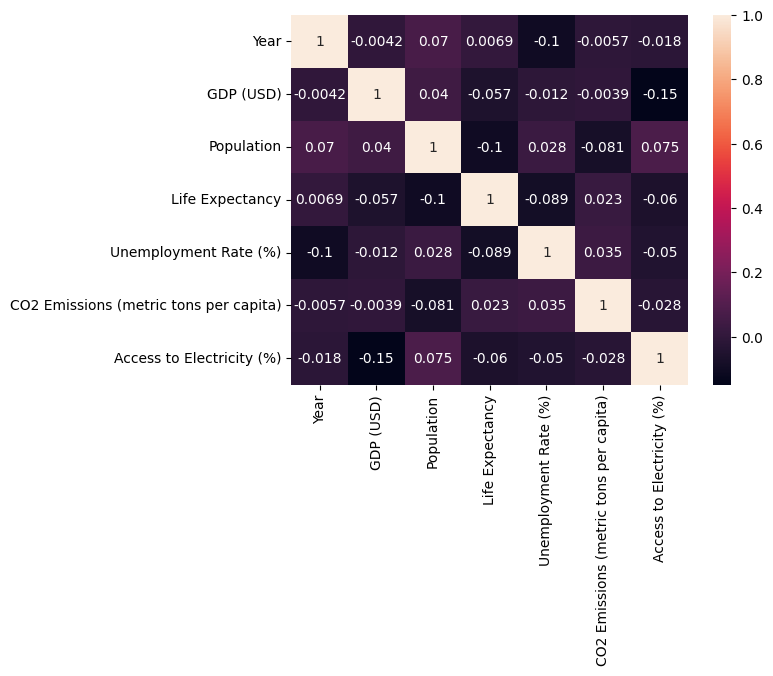

In [100]:
import seaborn as sns

world_bank_df_dropped = world_bank_df.drop(["Country"], axis=1)
sns.heatmap(world_bank_df_dropped.corr(), annot=True)

### 3. DataFrame

`pd.DataFrame()`可以用以下引數(Argument)創建DataFrame:
- 用字典(Dictionary)。
- 用列表(List)。
- 用關鍵字引數(Keyword Argument)`columns`指定行名(Column Name)。
- 用關鍵字引數(Keyword Argument)`index`指定列(Row)的索引標籤(Index Label)。

In [67]:
# Check the type
type(df)

pandas.core.frame.DataFrame

In [68]:
# `pd.DataFrame(dict)`
people = {"Name": ["Tom", "Susan", "Mary", "Joe"], "Age": [36, 18, 22, 36]}

pd.DataFrame(people)

,Name,Age
0,Tom,36
1,Susan,18
2,Mary,22
3,Joe,36


In [69]:
# `pd.DataFrame(list)`
pd.DataFrame([1, 2, 3, 4, 5])

,0
0,1
1,2
2,3
3,4
4,5


In [70]:
# `pd.DataFrame(list, columns=list)`
people = [["Tom", 36], ["Susan", 18], ["Mary", 22], ["Joe", 36]]

pd.DataFrame(people, columns=["Name", "Age"])

,Name,Age
0,Tom,36
1,Susan,18
2,Mary,22
3,Joe,36


In [71]:
# `pd.DataFrame(list, columns=list, index=list)`
people = [["Tom", 36], ["Susan", 18], ["Mary", 22], ["Joe", 36]]

pd.DataFrame(people, columns=["Name", "Age"], index=["Zero", "One", "Two", "Three"])

,Name,Age
Zero,Tom,36
One,Susan,18
Two,Mary,22
Three,Joe,36


### 4. Series

`pd.Series()`是標籤的一維矩陣(One dimension labeled  array)，可以用如下方法創建:
- 用列表(List)。
- `pd.Series()`用關鍵字引數(Keyword Argument)`columns`指定行(Column)的索引標籤(Index Label)。
- Series沒有支援行名(Column Name)。

In [72]:
# `pd.Series(list)`
pd.Series([1, 2, 3, 4, 5])

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [73]:
# `pd.Series(list, index=list)`
s = pd.Series([1, 2, 3, 4, 5], index=["a", "b", "c", "d", "e"])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [74]:
# Check the type
type(s)

pandas.core.series.Series

In [75]:
# Get value from index
s["a"]

1

In [76]:
# Use a list of indexes to get more than one row
s[["a", "d"]]

a    1
d    4
dtype: int64

### 5. 行(Column)與列(Row)的選取

- 行(Column)的選取:
  - `df["column name"]`:用行名(Column Name)選取DataFrame整行(Column)，事實上是回傳Series。
  - `df[list("column name")]`:用多個行名(`[list]`)可以選取DataFrame一部分的行(Column)。
- 列(Row)的選取:
  - `df.iloc[index index]`:用真正的索引值(Index indices)選取列(Row)。
  - `df.loc[index label]`:用索引標籤(Index labels)選取列(Row)。
  - 以上兩個函數都可以用列表(List)當引數(Argument)以取得多列。




In [77]:
# Series is the data structure for a single column of a DataFrame
type(df["Name"])

pandas.core.series.Series

In [78]:
df[["Name", "Sex"]]

,Name,Sex
0,"Braund, Mr. Owen Harris",male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,"Heikkinen, Miss. Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,"Allen, Mr. William Henry",male
...,...,...
886,"Montvila, Rev. Juozas",male
887,"Graham, Miss. Margaret Edith",female
888,"Johnston, Miss. Catherine Helen ""Carrie""",female
889,"Behr, Mr. Karl Howell",male


In [79]:
type(df[["Name", "Sex"]])

pandas.core.frame.DataFrame

In [80]:
# Use other dataframe as example
people = [["Tom", 36], ["Susan", 18], ["Mary", 22], ["Joe", 36]]

people_df = pd.DataFrame(people, columns=["Name", "Age"], index=["Zero", "One", "Two", "Three"])
people_df

,Name,Age
Zero,Tom,36
One,Susan,18
Two,Mary,22
Three,Joe,36


In [81]:
# `df.iloc(index indices)` select row
people_df.iloc[0]

Name    Tom
Age      36
Name: Zero, dtype: object

In [82]:
# `df.loc(index label)` select row
people_df.loc["Zero"]

Name    Tom
Age      36
Name: Zero, dtype: object

In [83]:
# Select multiple rows
people_df.loc[["Zero", "One"]]

,Name,Age
Zero,Tom,36
One,Susan,18


### 6. 資料篩選(Data Filtering):
- `df[conditional expression]`是一個布林(Boolean)的Series，可以用`df[df[conditional expression]]`選取DataFrame的子集(Subset)，結果也是DataFrame。
- `df[df["column name"].isin(list(value))]`:選取符合給定列表(List)裡面值的列(Row)。
- `df[df["column name"].isnull()]`:選取該行(Column)缺值的列(Row)。
- `df[df["column name"].notnull()]`:選取該行(Column)沒缺值的列(Row)。
- `df[df["column name"].between(head, tail)]`:選取該行(Column)的值在某範圍內的列(Row)。

In [84]:
# Use comparison operators to select
df[df["Age"] < 18]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


In [85]:
# Use `==` or `!=` to select
df[df["Name"] == "Jack Dawson"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [86]:
df[df["Name"] == "Behr, Mr. Karl Howell"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0,C148,C


In [87]:
# A series with `True` or `False`
df["Name"] == "Behr, Mr. Karl Howell"

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889     True
890    False
Name: Name, Length: 891, dtype: bool

In [88]:
# `isin()`
df[df["Embarked"].isin(["S", "Q"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [89]:
# `isnull()`
df[df["Cabin"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [90]:
# `notnull()`
df[df["Cabin"].notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [91]:
# `between()`
df[df["Age"].between(18, 60)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [95]:
# `str.contains()`
df[df["Name"].str.contains("Mr")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
